<a href="https://colab.research.google.com/github/TanmayVasishta/ML-Labs-TanmayVasishta1WA23CS012/blob/main/1WA23CS012Lab3LogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- PART 1: HR EMPLOYEE RETENTION (Binary Classification) ---
HR Dataset loaded successfully.

[Analysis] Average values for employees who stayed (0) vs left (1):
      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


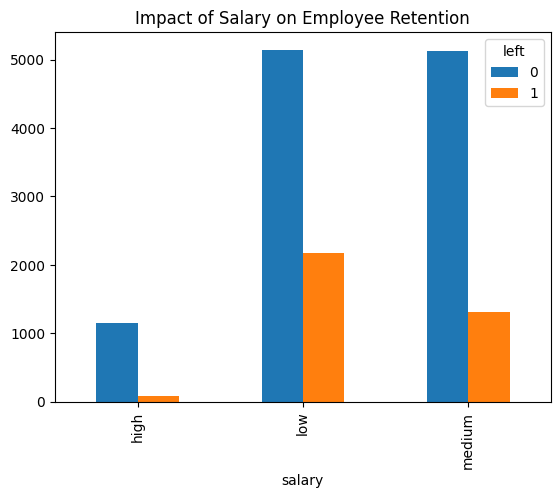

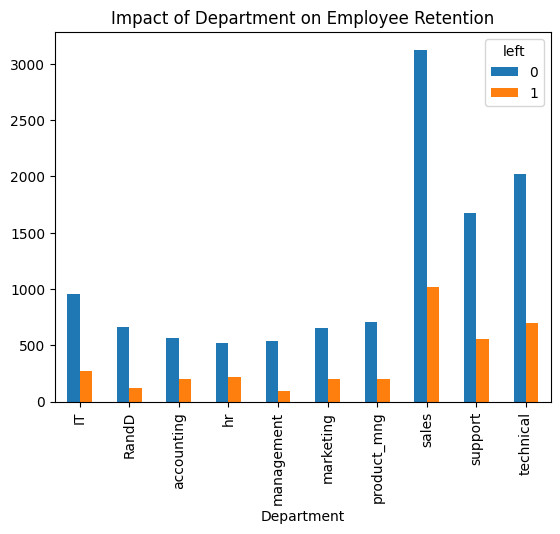


[Result] HR Model Accuracy: 0.76


--- PART 2: ZOO ANIMAL CLASSIFICATION (Multiclass) ---
Zoo Datasets loaded successfully.

[Check] Missing values in Zoo dataset:
0

[Result] Zoo Model Accuracy: 0.95


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


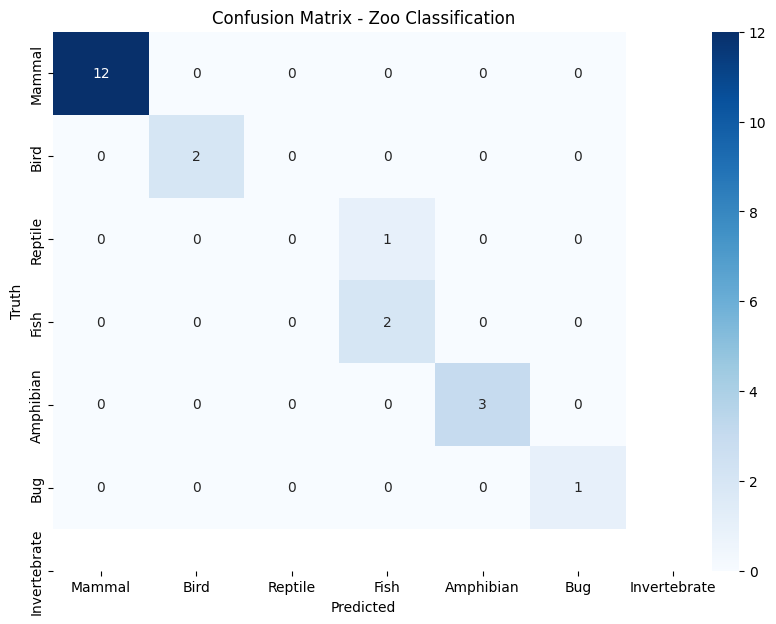


[Analysis] Classification Report:
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        12
        Bird       1.00      1.00      1.00         2
     Reptile       0.00      0.00      0.00         1
        Fish       0.67      1.00      0.80         2
   Amphibian       0.00      0.00      0.00         0
         Bug       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.67      0.71      0.69        21
weighted avg       0.92      0.95      0.93        21



In [2]:
# ==========================================
# LAB 3: LOGISTIC REGRESSION (Binary & Multiclass)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==========================================
# PART 1: BINARY CLASSIFICATION (HR Dataset)
# ==========================================
print("--- PART 1: HR EMPLOYEE RETENTION (Binary Classification) ---")

# 1. Load the dataset
try:
    df_hr = pd.read_csv("HR_comma_sep.csv")
    print("HR Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: HR_comma_sep.csv not found. Please upload it.")

# 2. Data Exploration (Answering: "Which variables have impact?")
# Let's group by 'left' to see the mean values of numeric variables
print("\n[Analysis] Average values for employees who stayed (0) vs left (1):")
print(df_hr.groupby('left').mean(numeric_only=True))

# Visualization: Impact of Salary on retention
pd.crosstab(df_hr.salary, df_hr.left).plot(kind='bar')
plt.title("Impact of Salary on Employee Retention")
plt.show()

# Visualization: Impact of Department on retention
pd.crosstab(df_hr.Department, df_hr.left).plot(kind='bar')
plt.title("Impact of Department on Employee Retention")
plt.show()

# 3. Data Preprocessing
# We need to convert 'salary' (text) into numbers.
# 'Department' has high cardinality, but let's assume we focus on Salary, Satisfaction, Avg Hours, and Promotion based on the groupby results.

# Creating dummy variables for salary (low, medium, high)
subdf = df_hr[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
df_with_dummies = pd.concat([subdf, salary_dummies], axis='columns')
df_with_dummies.drop('salary', axis='columns', inplace=True)

# Define X (Features) and y (Target)
X_hr = df_with_dummies
y_hr = df_hr.left

# 4. Split Dataset
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_hr, y_hr, train_size=0.8, random_state=42)

# 5. Build Logistic Regression Model
model_hr = LogisticRegression(max_iter=1000) # Increased max_iter to ensure convergence
model_hr.fit(X_train_hr, y_train_hr)

# 6. Measure Accuracy
accuracy_hr = model_hr.score(X_test_hr, y_test_hr)
print(f"\n[Result] HR Model Accuracy: {accuracy_hr:.2f}")


# ==========================================
# PART 2: MULTICLASS CLASSIFICATION (Zoo Dataset)
# ==========================================
print("\n\n--- PART 2: ZOO ANIMAL CLASSIFICATION (Multiclass) ---")

# 1. Load the datasets
try:
    df_zoo = pd.read_csv("zoo-data.csv")
    df_class = pd.read_csv("zoo-class-type.csv")
    print("Zoo Datasets loaded successfully.")
except FileNotFoundError:
    print("Error: zoo-data.csv or zoo-class-type.csv not found.")

# 2. Preprocessing (Answering: "Did you perform any preprocessing?")
# Check for missing values
print("\n[Check] Missing values in Zoo dataset:")
print(df_zoo.isnull().sum().sum())

# Drop 'animal_name' as it is a unique identifier and not a feature for prediction
X_zoo = df_zoo.drop(['animal_name', 'class_type'], axis=1)
y_zoo = df_zoo['class_type']

# 3. Split Dataset
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(X_zoo, y_zoo, test_size=0.2, random_state=42)

# 4. Build Logistic Regression Model (Multiclass)
# solver='liblinear' is often good for small datasets, but 'lbfgs' is standard for multiclass
model_zoo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000)
model_zoo.fit(X_train_z, y_train_z)

# 5. Measure Accuracy
accuracy_zoo = model_zoo.score(X_test_z, y_test_z)
print(f"\n[Result] Zoo Model Accuracy: {accuracy_zoo:.2f}")

# 6. Confusion Matrix
y_pred_zoo = model_zoo.predict(X_test_z)
cm = confusion_matrix(y_test_z, y_pred_zoo)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
# We can use the class names from the other CSV for better labels
class_names = df_class['Class_Type'].tolist()
# Note: Ensure the class numbers match indices (zoo classes are 1-7, indices are 0-6)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Zoo Classification')
plt.show()

# 7. Classification Report (Fixed)
from sklearn.metrics import classification_report

# We explicitly define the labels [1, 2, 3, 4, 5, 6, 7] so it doesn't crash if one is missing
all_classes = df_class['Class_Number'].tolist()
all_names = df_class['Class_Type'].tolist()

print("\n[Analysis] Classification Report:")
# zero_division=0 prevents warnings for the missing class
print(classification_report(y_test_z, y_pred_zoo, labels=all_classes, target_names=all_names, zero_division=0))